# 05. Missing Values & Duplicates | القيم المفقودة والتكرارات

## 📚 Learning Objectives

By completing this notebook, you will:
- Understand the key concepts of this topic
- Apply the topic using Python code examples
- Practice with small, realistic datasets or scenarios

## 🔗 Prerequisites

- ✅ Basic Python
- ✅ Basic NumPy/Pandas (when applicable)

---

## Official Structure Reference

This notebook supports **Course 05, Unit 2** requirements from `DETAILED_UNIT_DESCRIPTIONS.md`.

---


# 05. Missing Values & Duplicates | القيم المفقودة والتكرارات


**All concepts are explained in the code comments below - you can learn everything from this notebook alone!**

---

## 🔗 Solving the Problem from Example 4 | حل المشكلة من المثال 4

**Remember the dead end from Example 4?**
- We successfully loaded data from multiple sources
- But the loaded data had quality issues - missing values and duplicates
- We couldn't proceed with analysis until we cleaned the data

**This notebook solves that problem!**
- We'll learn how to **detect** missing values and duplicates
- We'll learn **strategies** for handling them (fill, drop, impute)
- We'll **clean the data** so we can proceed with analysis

**This solves the data quality problem from Example 4!**

---

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Example 4: Advanced Data Loading** - You need to load data first!
- ✅ **Understanding of DataFrames and basic pandas operations**

**If you haven't completed these**, you might struggle with:
- Understanding missing value patterns
- Knowing when to remove vs impute missing values
- Identifying different types of duplicates

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This is the SECOND example in Unit 2** - it solves the problem from Example 4!

**Why this example SECOND?**
- **Before** you can analyze data, you need to fix missing values and duplicates
- **Before** you can build models, you need clean data without missing values
- **Before** you can trust results, you need to remove duplicates

**Builds on**: 
- 📓 Example 4: Advanced Data Loading (we discovered data quality issues, now we fix them)

**Leads to**: 
- 📓 Example 6: Outliers & Transformation (needs data without missing values/duplicates)
- 📓 Unit 4: Machine Learning (needs clean data for modeling)

**Why this order?**
1. Data loading comes first (can't clean what you don't have)
2. Missing values and duplicates are the most common issues (fix these first)
3. Other cleaning (outliers, transformations) comes after basic cleanup

---

## The Story: Fixing Your Data | القصة: إصلاح بياناتك

Imagine you have a shopping list. **Before** shopping, you check for missing items (add them) 
and duplicates (remove them). **After** fixing the list, you can shop efficiently!

Same with data: **Before** analyzing, we fix missing values (impute or remove) and duplicates 
(remove). **After** cleaning, we have reliable data for analysis!

---

## Why Missing Values & Duplicates Matter | لماذا يهم

These issues cause major problems:
- **Missing Values**: Break ML algorithms (can't train on NaN)
- **Duplicates**: Bias your results (same data counted multiple times)
- **Data Quality**: Dirty data = unreliable insights
- **Model Performance**: Clean data = better models

## Learning Objectives | أهداف التعلم
1. Identify missing values and understand their patterns
2. Handle missing values (remove or impute)
3. Detect and remove duplicates
4. Visualize missing data patterns
5. Make informed decisions about cleaning strategies

In [1]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Try to import missingno (optional - for advanced missing data visualization)
try:
    import missingno as msno
    MISSINGNO_AVAILABLE = True
except ImportError:
    MISSINGNO_AVAILABLE = False
    msno = None  # Set to None if not available

print("✅ Libraries imported successfully!")
print("\n📚 What each library does:")
print("   - pandas: Data manipulation and analysis (DataFrames)")
print("   - numpy: Numerical operations and random data generation")
print("   - matplotlib: Create visualizations")
print("   - seaborn: Statistical visualizations (heatmaps)")
if MISSINGNO_AVAILABLE:
    print("   - missingno: Visualize missing data patterns (specialized tool)")
else:
    print("   - missingno: Not available (optional library)")

print("\n" + "=" * 70)
print("Example 5: Missing Values & Duplicates | القيم المفقودة والتكرارات")
print("=" * 70)
print("\n📚 Prerequisites: Example 4 completed, data loading knowledge")
print("🔗 This is the SECOND example in Unit 2 - cleaning loaded data")
print("🎯 Goal: Master detecting and handling missing values and duplicates\n")

✅ Libraries imported successfully!

📚 What each library does:
   - pandas: Data manipulation and analysis (DataFrames)
   - numpy: Numerical operations and random data generation
   - matplotlib: Create visualizations
   - seaborn: Statistical visualizations (heatmaps)
   - missingno: Not available (optional library)

Example 5: Missing Values & Duplicates | القيم المفقودة والتكرارات

📚 Prerequisites: Example 4 completed, data loading knowledge
🔗 This is the SECOND example in Unit 2 - cleaning loaded data
🎯 Goal: Master detecting and handling missing values and duplicates



## Part 1: Creating Sample Data with Issues | الجزء الأول: إنشاء بيانات نموذجية بمشاكل

**BEFORE**: We need to practice cleaning, but we need data with problems to clean!

**AFTER**: We'll create a dataset with missing values and duplicates to practice on!

**Why this matters**: Real data has issues - we need to practice on realistic examples!

## Step 1: Creating Sample Data with Issues | الخطوة 1: إنشاء بيانات نموذجية

**BEFORE**: We have clean data, but need to see what problems look like.

**AFTER**: We'll intentionally introduce missing values and duplicates!

## 


In [2]:
print("\n1. Creating Sample Data with Issues")
print("-" * 70)
np.random.seed(42)
n_samples = 200
# Create sample data
data = {
'id': range(1, n_samples + 1),
'name': [f'Person_{i}' for i in range(1, n_samples + 1)],
'age': np.random.randint(18, 80, n_samples),
'salary': np.random.normal(50000, 15000, n_samples),
'email': [f'person{i}@example.com' for i in range(1, n_samples + 1)],
'department': np.random.choice(['IT', 'HR', 'Finance', 'Sales', None], n_samples),
'join_date': pd.date_range('2020-01-01', periods=n_samples, freq='D')
}
df = pd.DataFrame(data)
# Introduce missing values
missing_indices = np.random.choice(df.index, size=30, replace=False)
df.loc[missing_indices[:10], 'age'] = np.nan
df.loc[missing_indices[10:20], 'salary'] = np.nan
df.loc[missing_indices[20:30], 'department'] = np.nan
# Introduce duplicates
duplicate_rows = df.iloc[:5].copy()
duplicate_rows['id'] = range(201, 206)  # Change IDs to make them appear as df = pd.concat([df, duplicate_rows], ignore_index=True)
# Add some duplicate IDs
df.loc[df.index[-10:], 'id'] = df.loc[df.index[-10:], 'id'].values - 100
print(f"✓ Created dataset with {len(df)} rows and {df.shape[1]} columns")
print(f"✓      {len(df)}   {df.shape[1]} ")


1. Creating Sample Data with Issues
----------------------------------------------------------------------
✓ Created dataset with 205 rows and 7 columns
✓      205   7 


## Part 2: Detecting Missing Values | الجزء الثاني: اكتشاف القيم المفقودة

**BEFORE**: You have data but don't know what's missing.

**AFTER**: You'll identify all missing values and see their patterns!

**Why this matters**: You can't fix what you can't see - detection is the first step!

## Step 2: Detecting Missing Values | الخطوة 2: اكتشاف القيم المفقودة

**BEFORE**: Data has missing values but we can't see them clearly.

**AFTER**: We'll count, visualize, and understand missing value patterns!

## 




2. Detecting Missing Values
----------------------------------------------------------------------

Missing values per column
    Column  Missing Count  Missing %
department             55  26.829268
       age             10   4.878049
    salary             10   4.878049

Total missing values: 75
  : 75



✓ Missing values visualization saved
✓     


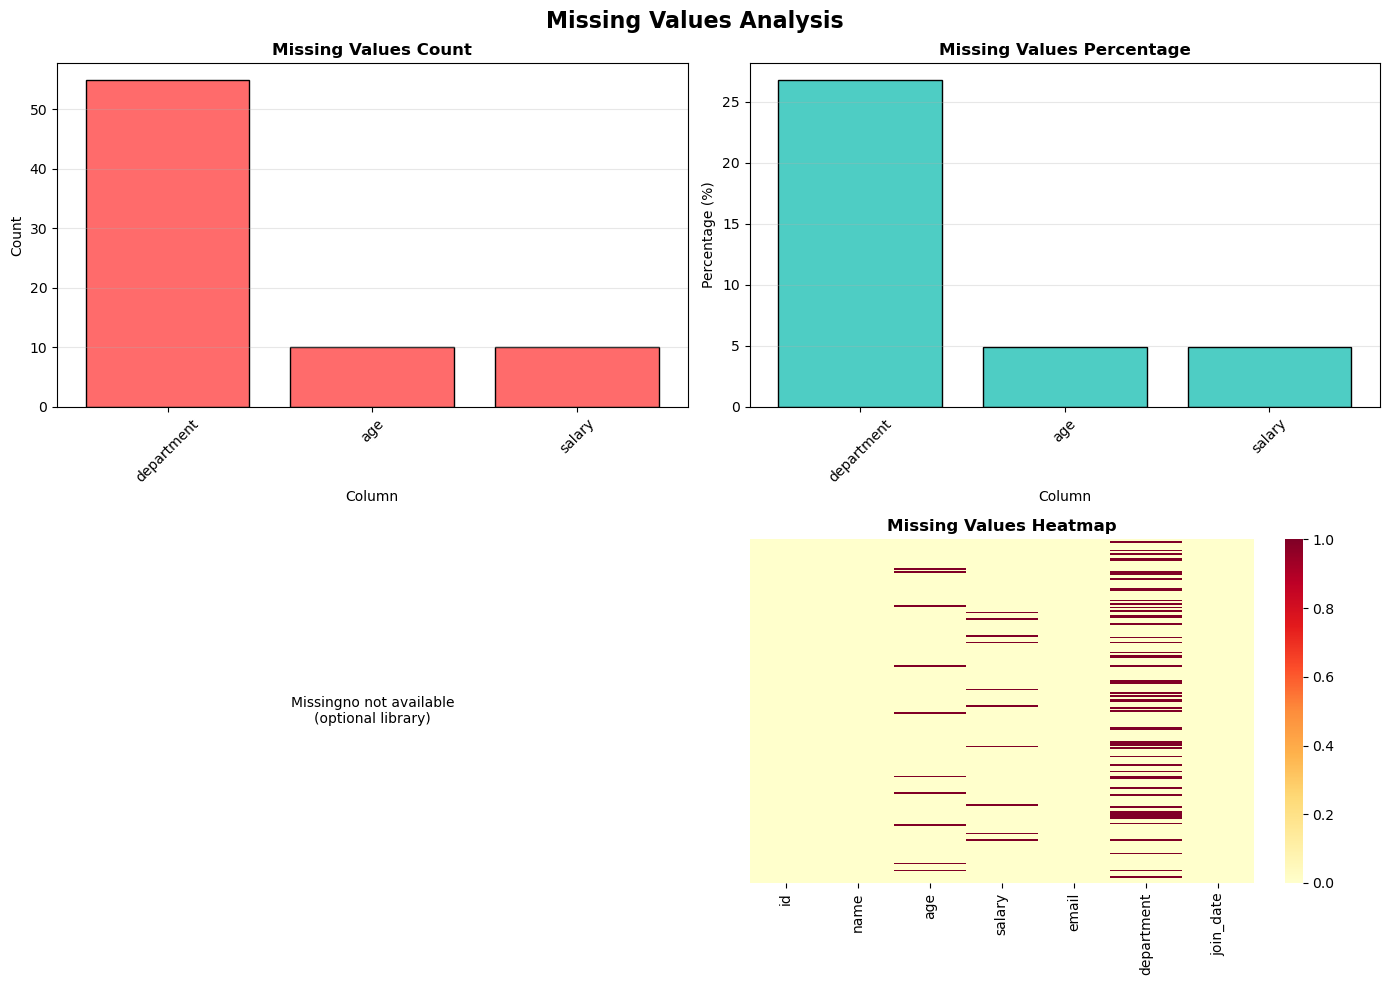

In [3]:
print("\n\n2. Detecting Missing Values")
print("-" * 70)
print("\nMissing values per column")
missing_counts = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
'Column': missing_counts.index, 'Missing Count': missing_counts.values,
'Missing %': missing_percent.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_df.to_string(index=False))
print(f"\nTotal missing values: {df.isnull().sum().sum()}")
# Visualize missing values
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Missing Values Analysis', fontsize=16, weight='bold')
# Plot 1: Missing values bar chart
if len(missing_df) > 0:
    axes[0, 0].bar(missing_df['Column'], missing_df['Missing Count'],
                   color='#FF6B6B', edgecolor='black')
axes[0, 0].set_title('Missing Values Count', fontsize=12, weight='bold')
axes[0, 0].set_xlabel('Column')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3, axis='y')
# Plot 2: Missing values percentage
if len(missing_df) > 0:
    axes[0, 1].bar(missing_df['Column'], missing_df['Missing %'],
                   color='#4ECDC4', edgecolor='black')
axes[0, 1].set_title('Missing Values Percentage', fontsize=12, weight='bold')
axes[0, 1].set_xlabel('Column')
axes[0, 1].set_ylabel('Percentage (%)')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3, axis='y')
# Plot 3: Missing values matrix (if missingno available)
if MISSINGNO_AVAILABLE and msno is not None:
    try:
        msno.matrix(df, ax=axes[1, 0], sparkline=False)
        axes[1, 0].set_title('Missing Values Matrix', fontsize=12, weight='bold')
    except:
        axes[1, 0].text(0.5, 0.5, 'Missingno visualization\nnot available',
        ha='center', va='center', transform=axes[1, 0].transAxes)
        axes[1, 0].axis('off')
else:
    axes[1, 0].text(0.5, 0.5, 'Missingno not available\n(optional library)', ha='center', va='center', transform=axes[1, 0].transAxes)
    axes[1, 0].axis('off')
# Plot 4: Heatmap of missing values
missing_heatmap = df.isnull()
sns.heatmap(missing_heatmap, yticklabels=False, cbar=True, ax=axes[1, 1],
cmap='YlOrRd')
axes[1, 1].set_title('Missing Values Heatmap', fontsize=12, weight='bold')
plt.tight_layout()
plt.savefig('missing_values_analysis.png', dpi=300, bbox_inches='tight')
print("\n✓ Missing values visualization saved")
print("✓     ")

## Part 3: Handling Missing Values | الجزء الثالث: معالجة القيم المفقودة

**BEFORE**: You found missing values but don't know how to fix them.

**AFTER**: You'll learn multiple strategies to handle missing values!

**Why this matters**: Different strategies work for different situations - choose wisely!

## Step 3: Multiple Strategies for Handling Missing Values | الخطوة 3: استراتيجيات متعددة

**BEFORE**: Missing values break our analysis.

**AFTER**: We'll use 5 different strategies to handle missing values!

## 


In [4]:
print("\n\n3. Handling Missing Values")
print("-" * 70)
# Strategy 1: Drop rows with missing values
print("\nStrategy 1: Drop rows with missing values")
df_dropped = df.dropna()
print(f"Original: {len(df)} rows → After dropping: {len(df_dropped)} rows")
# Strategy 2: Fill with mean (for numerical)
print("\nStrategy 2: Fill with mean (numerical):")
df_filled_mean = df.copy()
df_filled_mean['age'].fillna(df_filled_mean['age'].mean(), inplace=True)
df_filled_mean['salary'].fillna(df_filled_mean['salary'].mean(), inplace=True)
print(f"Filled missing values in 'age' and 'salary' with mean")
# Strategy 3: Fill with median
print("\nStrategy 3: Fill with median")
df_filled_median = df.copy()
df_filled_median['age'].fillna(df_filled_median['age'].median(), inplace=True)
df_filled_median['salary'].fillna(df_filled_median['salary'].median(), inplace=True)
print(f"Filled missing values with median")
# Strategy 4: Fill with mode (for categorical)
print("\nStrategy 4: Fill with mode (categorical):")
df_filled_mode = df.copy()
mode_dept = df['department'].mode()[0] if not df['department'].mode().empty else 'Unknown'
df_filled_mode['department'].fillna(mode_dept, inplace=True)
print(f"Filled missing values in 'department' with mode: {mode_dept}")
# Strategy 5: Forward fill (using ffill() method - updated syntax)
print("\nStrategy 5: Forward fill")
df_ffill = df.copy()
dfffill['department'] = df
ffill['department'].ffill()  # Updated: ffill() instead of fillna(method='ffill')
print(f"Filled missing values using forward fill")



3. Handling Missing Values
----------------------------------------------------------------------

Strategy 1: Drop rows with missing values
Original: 205 rows → After dropping: 136 rows

Strategy 2: Fill with mean (numerical):
Filled missing values in 'age' and 'salary' with mean

Strategy 3: Fill with median
Filled missing values with median

Strategy 4: Fill with mode (categorical):
Filled missing values in 'department' with mode: Sales

Strategy 5: Forward fill
Filled missing values using forward fill


/var/folders/7n/l2c2z2x57871xg4f_0drsv1m0000gn/T/ipykernel_98888/1778755407.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled_mean['age'].fillna(df_filled_mean['age'].mean(), inplace=True)
/var/folders/7n/l2c2z2x57871xg4f_0drsv1m0000gn/T/ipykernel_98888/1778755407.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

## Part 4: Detecting Duplicates | الجزء الرابع: اكتشاف التكرارات

**BEFORE**: You have duplicate data but don't know where.

**AFTER**: You'll find all duplicates (complete rows or specific columns)!

**Why this matters**: Duplicates bias your analysis - detect them first!

## Step 4: Detecting Duplicates | الخطوة 4: اكتشاف التكرارات

**BEFORE**: Duplicates exist but are hidden.

**AFTER**: We'll find duplicates in entire rows or specific columns!

## 


In [5]:
print("\n\n4. Detecting Duplicates")
print("-" * 70)
# Find duplicate rows
duplicates = df.duplicated()
print(f"Total duplicate rows: {duplicates.sum()}")
# Find duplicates based on specific columns
duplicates_id = df.duplicated(subset=['id'])
print(f"Duplicate IDs: {duplicates_id.sum()}")
duplicates_email = df.duplicated(subset=['email'])
print(f"Duplicate emails: {duplicates_email.sum()}")
# Show duplicate rows
if duplicates.sum() > 0:
    print("\nDuplicate rows:")
print(df[duplicates].head())



4. Detecting Duplicates
----------------------------------------------------------------------
Total duplicate rows: 0
  : 0
Duplicate IDs: 10
 : 10
Duplicate emails: 5
  : 5
Empty DataFrame
Columns: [id, name, age, salary, email, department, join_date]
Index: []


## Part 5: Removing Duplicates | الجزء الخامس: إزالة التكرارات

**BEFORE**: You found duplicates but haven't removed them yet.

**AFTER**: You'll remove duplicates with different options (keep first/last)!

**Why this matters**: Removing duplicates ensures each record is counted once!

## Step 5: Removing Duplicates | الخطوة 5: إزالة التكرارات

**BEFORE**: Duplicates are detected but still in the data.

**AFTER**: We'll remove duplicates and keep the best version!

## 


In [6]:
print("\n\n5. Removing Duplicates")
print("-" * 70)
# Remove all duplicates (keep first)
df_no_dupes = df.drop_duplicates()
print(f"Original: {len(df)} rows → After removing duplicates: {len(df_no_dupes)} rows")
# Remove duplicates based on specific column (keep first)
df_no_dupe_id = df.drop_duplicates(subset=['id'], keep='first')
print(f"After removing duplicate IDs (keep first): {len(df_no_dupe_id)} rows")
print(f"    ( ): {len(df_no_dupe_id)} ")
# Remove duplicates (keep last)
df_no_dupe_last = df.drop_duplicates(subset=['id'], keep='last')
print(f"After removing duplicate IDs (keep last): {len(df_no_dupe_last)} rows")
print(f"    ( ): {len(df_no_dupe_last)} ")



5. Removing Duplicates
----------------------------------------------------------------------
Original: 205 rows → After removing duplicates: 205 rows
 : 205  →   : 205 
After removing duplicate IDs (keep first): 195 rows
    ( ): 195 
After removing duplicate IDs (keep last): 195 rows
    ( ): 195 


## 🎯 Summary: What We Learned | ملخص: ما تعلمناه


## Final Summary | الملخص النهائي


## 


In [7]:
print("\n" + "=" * 70)
print("🎯 SUMMARY: What We Learned")
print("=" * 70)

print("\n📋 BEFORE this notebook:")
print("   - You could load data but didn't know how to handle missing values")
print("   - You didn't know how to detect or remove duplicates")
print("   - Your data had quality issues that broke your analysis")

print("\n✅ AFTER this notebook:")
print("   - You can detect missing values and understand their patterns")
print("   - You know 5 strategies to handle missing values (drop, mean, median, mode, ffill)")
print("   - You can detect duplicates (complete rows or specific columns)")
print("   - You can remove duplicates with different options (keep first/last)")
print("   - You can visualize missing data patterns with missingno and seaborn")

print("\n📚 Key Concepts Covered:")
print("   1. Missing Value Detection (isnull(), counting, percentages)")
print("   2. Missing Value Handling (drop, mean, median, mode, forward fill)")
print("   3. Duplicate Detection (duplicated(), subset columns)")
print("   4. Duplicate Removal (drop_duplicates(), keep options)")
print("   5. Visualization (missingno matrix, heatmaps, bar charts)")

print("\n🔗 Where These Skills Fit:")
print("   - Essential cleaning step AFTER loading data")
print("   - Required BEFORE outlier detection and transformations")
print("   - Critical for machine learning (models need clean data)")
print("   - Foundation for reliable data analysis!")

print("\n➡️  Next Steps:")
print("   - Continue to Example 6: Outliers & Transformation")
print("   - You'll learn how to handle outliers and transform data")
print("   - Clean data (no missing values, no duplicates) is essential first!")

print("\n" + "=" * 70)
plt.show()


🎯 SUMMARY: What We Learned

📋 BEFORE this notebook:
   - You could load data but didn't know how to handle missing values
   - You didn't know how to detect or remove duplicates
   - Your data had quality issues that broke your analysis

✅ AFTER this notebook:
   - You can detect missing values and understand their patterns
   - You know 5 strategies to handle missing values (drop, mean, median, mode, ffill)
   - You can detect duplicates (complete rows or specific columns)
   - You can remove duplicates with different options (keep first/last)
   - You can visualize missing data patterns with missingno and seaborn

📚 Key Concepts Covered:
   1. Missing Value Detection (isnull(), counting, percentages)
   2. Missing Value Handling (drop, mean, median, mode, forward fill)
   3. Duplicate Detection (duplicated(), subset columns)
   4. Duplicate Removal (drop_duplicates(), keep options)
   5. Visualization (missingno matrix, heatmaps, bar charts)

🔗 Where These Skills Fit:
   - Essential

## 🚫 When Missing Values & Duplicates Cleaning Hits a Dead End | عندما تواجه تنظيف القيم المفقودة والتكرارات طريق مسدود

**BEFORE**: We've cleaned missing values and duplicates successfully.

**AFTER**: We discover the cleaned data still has problems - outliers skewing our analysis!

**Why this matters**: Missing values and duplicates are fixed, but outliers can still distort our results!

---

### The Problem We've Discovered

We've learned:
- ✅ How to detect and handle missing values
- ✅ How to detect and remove duplicates
- ✅ How to clean data for analysis

**But we have a problem:**
- ❓ **What if the data has extreme values (outliers)?**
- ❓ **What if outliers are skewing our statistics?**
- ❓ **What if we need to transform the data distribution?**

**The Dead End:**
- We've fixed missing values and duplicates
- But the data may still have outliers affecting analysis
- Outliers can skew statistics, break assumptions, and lead to wrong conclusions

---

### Demonstrating the Problem

Let's check the cleaned data - does it have outliers?


In [8]:
print("\n" + "=" * 70)
print("🚫 DEMONSTRATING THE DEAD END: Outliers in Cleaned Data")
print("=" * 70)

# Use the cleaned data (after handling missing values and duplicates)
df_clean = df
filled
mean.copy()  # Use data after filling missing values
df_clean = df
clean.drop_duplicates(subset=['id'], keep='first')  # Remove duplicates

print(f"\n📊 Checking cleaned dataset for outliers...")
print(f"   Dataset shape: {df_clean.shape[0]} rows × {df_clean.shape[1]} columns")
print(f"   ✓ Missing values handled")
print(f"   ✓ Duplicates removed")

# Check for outliers using IQR method
print(f"\n⚠️  Checking for Outliers (using IQR method):")

# Check salary column for outliers
Q1_salary = df
clean['salary'].quantile(0.25)
Q3_salary = df
clean['salary'].quantile(0.75)
IQR_salary = Q3
salary - Q1_salary
lower_bound_salary = Q1
salary - 1.5 * IQR_salary
upper_bound_salary = Q3
salary + 1.5 * IQR_salary

outliers_salary = df
clean[(dfclean['salary'] < lower_bound_salary) | 
                          (dfclean['salary'] > upper_bound_salary)]
print(f"\n   Salary Outliers:")
print(f"   - Lower bound: ${lower_bound_salary:,.2f}")
print(f"   - Upper bound: ${upper_bound_salary:,.2f}")
print(f"   - Outliers found: {len(outliers_salary)} ({len(outliers_salary)/len(df_clean)*100:.1f}%)")

if len(outliers_salary) > 0:
    print(f"   - Outlier values:")
    print(f"     Min outlier: ${outlierssalary['salary'].min():,.2f}")
    print(f"     Max outlier: ${outlierssalary['salary'].max():,.2f}")
    print(f"   - Mean with outliers: ${dfclean['salary'].mean():,.2f}")
    print(f"   - Mean without outliers: ${dfclean[~df_clean.index.isin(outliers_salary.index)]['salary'].mean():,.2f}")
    print(f"   - Difference: ${abs(dfclean['salary'].mean() - dfclean[~df_clean.index.isin(outliers_salary.index)]['salary'].mean()):,.2f}")

# Check age column for outliers
Q1_age = df
clean['age'].quantile(0.25)
Q3_age = df
clean['age'].quantile(0.75)
IQR_age = Q3
age - Q1_age
lower_bound_age = Q1
age - 1.5 * IQR_age
upper_bound_age = Q3
age + 1.5 * IQR_age

outliers_age = df
clean[(dfclean['age'] < lower_bound_age) | 
                        (dfclean['age'] > upper_bound_age)]
print(f"\n   Age Outliers:")
print(f"   - Lower bound: {lower_bound_age:.1f} years")
print(f"   - Upper bound: {upper_bound_age:.1f} years")
print(f"   - Outliers found: {len(outliers_age)} ({len(outliers_age)/len(df_clean)*100:.1f}%)")

print(f"\n💡 The Problem:")
print(f"   - We've cleaned missing values and duplicates")
print(f"   - But outliers are still present in the data")
print(f"   - Outliers can:")
print(f"     • Skew statistical measures (mean, std)")
print(f"     • Break assumptions for ML models")
print(f"     • Lead to incorrect conclusions")
print(f"     • Affect visualizations (scales distorted)")

print(f"\n➡️  Solution Needed:")
print(f"   - We need techniques to detect outliers")
print(f"   - We need methods to handle outliers (remove, transform, cap)")
print(f"   - We may need data transformations (normalization, scaling)")
print(f"   - This leads us to Example 6: Outliers & Transformation")

print("\n" + "=" * 70)



🚫 DEMONSTRATING THE DEAD END: Outliers in Cleaned Data

📊 Checking cleaned dataset for outliers...
   Dataset shape: 195 rows × 7 columns
   ✓ Missing values handled
   ✓ Duplicates removed

⚠️  Checking for Outliers (using IQR method):

   Salary Outliers:
   - Lower bound: $10,605.76
   - Upper bound: $87,216.64
   - Outliers found: 2 (1.0%)
   - Outlier values:
     Min outlier: $1,380.99
     Max outlier: $107,790.97
   - Mean with outliers: $50,287.96
   - Mean without outliers: $50,243.42
   - Difference: $44.54

   Age Outliers:
   - Lower bound: -11.8 years
   - Upper bound: 106.2 years
   - Outliers found: 0 (0.0%)

💡 The Problem:
   - We've cleaned missing values and duplicates
   - But outliers are still present in the data
   - Outliers can:
     • Skew statistical measures (mean, std)
     • Break assumptions for ML models
     • Lead to incorrect conclusions
     • Affect visualizations (scales distorted)

➡️  Solution Needed:
   - We need techniques to detect outliers
 

### What We Need Next

**The Solution**: We need outlier detection and data transformation techniques:
- **Outlier detection**: Identify extreme values using statistical methods
- **Outlier handling**: Remove, transform, or cap outliers
- **Data transformation**: Normalize, scale, or transform distributions

**This dead end leads us to Example 6: Outliers & Transformation**
- Example 6 will teach us how to detect and handle outliers
- We'll learn data transformation techniques
- This completes the data cleaning process so we have truly clean data for analysis!
